# Practicel ML - KNN

### Full Name : Sina Namazi
### Student Number : 400110154

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [2]:
# TODO
path = 'train.csv'
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [3]:
# TODO
num_samples = data.shape[0]
print('Number of samples:', num_samples)

Number of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [4]:
# TODO
num_unique = data.nunique()
print('Number of unique values for each column:')
print(num_unique)

Number of unique values for each column:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
Tr

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [5]:
# TODO
for col in data.columns:
    if data[col].nunique() < 2:
        data.drop(col, axis=1, inplace=True)
print('Number of unique values for each column after removing columns with less than two unique values:')
print(data.nunique())

Number of unique values for each column after removing columns with less than two unique values:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBala

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [6]:
# handle uniqueness
# TODO
print('Number of unique values for BusinessTravel:', data['BusinessTravel'].nunique())
mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

Number of unique values for BusinessTravel: 3


In [7]:
# Map the column
# TODO
data['BusinessTravel_num'] = data['BusinessTravel'].map(mapping)

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


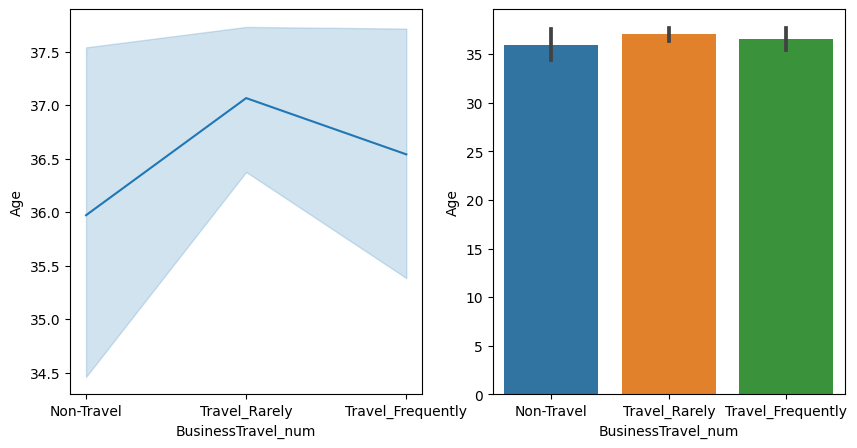

In [8]:
# plot
# TODO
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='BusinessTravel_num', y='Age', data=data)
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.subplot(1, 2, 2)
sns.barplot(x='BusinessTravel_num', y='Age', data=data)
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.show()

data.drop('BusinessTravel_num', axis=1, inplace=True)

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


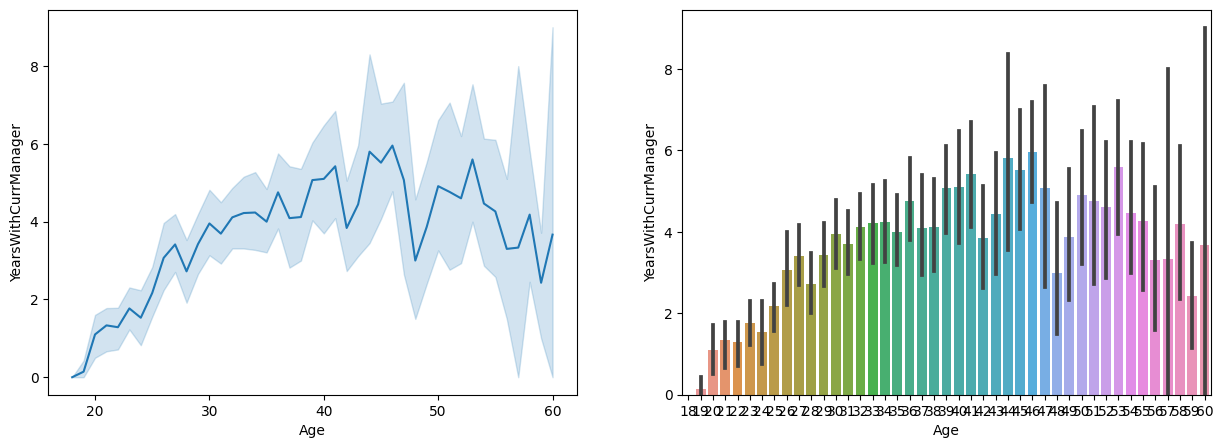

In [9]:
# TODO
# sns.lineplot(x='Age', y='YearsWithCurrManager', data=data)
# plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y='YearsWithCurrManager', data=data)

plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='YearsWithCurrManager', data=data)

plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


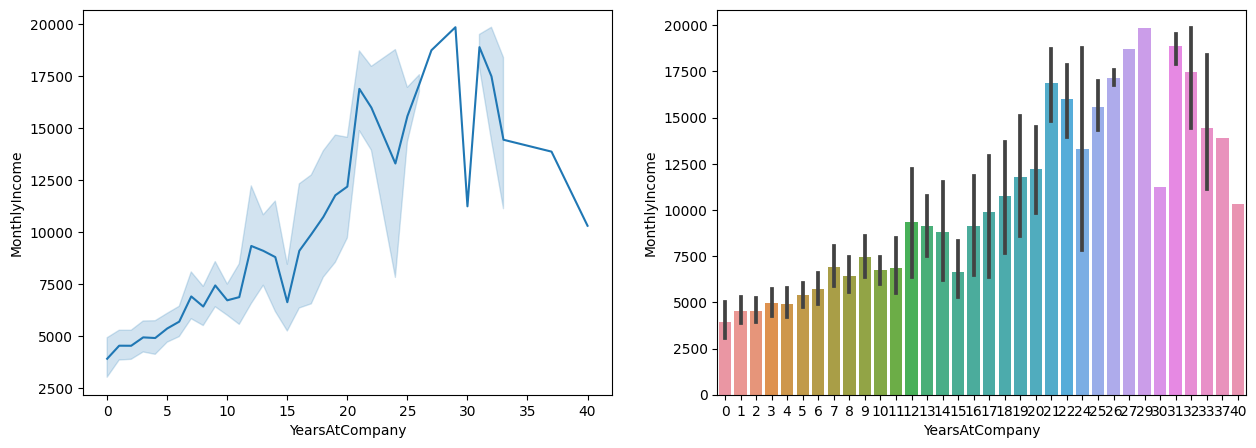

In [10]:
# TODO
# sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=data)
# plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=data)

plt.subplot(1, 2, 2)
sns.barplot(x='YearsAtCompany', y='MonthlyIncome', data=data)

plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [11]:
# Label encode
# TODO
le = LabelEncoder()
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,36,0,2,884,2,1,4,1,1585,2,...,3,1,0,15,5,3,1,0,0,0
2,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
3,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
4,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8


In [12]:
# split into train and validation

# TODO
train, test = train_test_split(data, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)


In [13]:
# lens of train and validation datasets

# TODO
print('Length of training dataset:', len(train))
print('Length of validation dataset:', len(val))
print('Length of test dataset:', len(test))


Length of training dataset: 660
Length of validation dataset: 221
Length of test dataset: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [14]:
# TODO
X_train = train.drop('Attrition', axis=1)
y_train = train['Attrition']

X_val = val.drop('Attrition', axis=1)
y_val = val['Attrition']

X_test = test.drop('Attrition', axis=1)
y_test = test['Attrition']


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [15]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        y_pred = np.array([self._predict(x) for x in X_test.values])
        return y_pred

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train.values]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [16]:
# TODO
knn = KNN(k=3)
knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [17]:
# TODO
y_pred = knn.predict(X_train)
train_accuracy = np.mean(y_pred == y_train)
y_pred = knn.predict(X_test)
test_accuracy = np.mean(y_pred == y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Train accuracy: 0.8878787878787879
Test accuracy: 0.7601809954751131


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [18]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [19]:
# TODO
y_pred = knn.predict(X_train)
train_accuracy = np.mean(y_pred == y_train)
y_pred = knn.predict(X_test)
test_accuracy = np.mean(y_pred == y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Train accuracy: 0.8878787878787879
Test accuracy: 0.7601809954751131


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**